<a href="https://colab.research.google.com/github/Kathryn-Hise/2kChickensV1Knight/blob/main/Penguin_vs_Santa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.core.numeric import zeros_like

In [13]:
santa0 = 36
peng0 = 200
santaFinal = 10
pengFinal = 0
timeend = 105-45 #seconds

The solver successfully reached the end of the integration interval.
nfev =  32


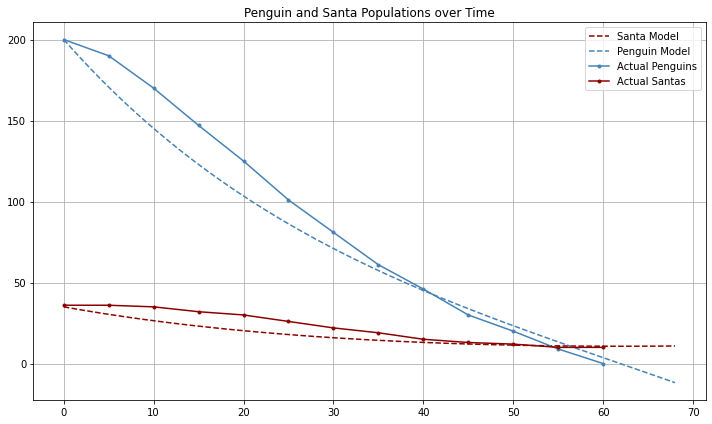

beta = 0.005
alpha = 0.18


In [74]:
#p1 = santa, p2 = pengbattletime = timeend
penglosses = peng0 - pengFinal 
santalosses = santa0 - santaFinal
beta = 0.005#0.0048 #santa loss per peng #.005
alpha = 0.18#0.178 #peng loss per santa #.18

def f(t,yvec):
  santapop = yvec[0]  # santaica 
  pengpop = yvec[1] #pengan
  return [-beta*pengpop, -alpha*santapop]

def santaloss(t,yvec):
  return yvec[0]

def pengloss(t,yvec):
  return yvec[1]

TMAX = timeend
y0 = [santa0, peng0] 
t = np.linspace(0, TMAX, num=205)
ivp = solve_ivp(f, [0,TMAX],y0, t_eval=t,events=(santaloss,pengloss))
print(ivp.message)
print('nfev = ',ivp.nfev)
#t = ivp.t
santa = ivp.y[0]
peng = ivp.y[1]

#actual
pdata = np.array([200,190,170,147,125,101,81,61,46,30,20,9,0])
sdata = np.array([36,36,35,32,30,26,22,19,15,13,12,10,10])
tdata = np.linspace(45,105,num=13)
#print(tdata)
LENloop = len(tdata)
for i in range(LENloop):
  tdata[i] -= 45

plt.figure(figsize=(10,6))
plt.plot(t, santa,'--',color='darkred',label='Santa Model')
plt.title('Penguin and Santa Populations over Time')
plt.plot(t, peng,'r--',color='steelblue',label='Penguin Model')
plt.plot(tdata,pdata,'.-',color='steelblue',label="Actual Penguins")
plt.plot(tdata,sdata,'.-',color='darkred',label='Actual Santas')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
print(f'beta = {beta}')
print(f'alpha = {alpha}')

In [70]:
#Error Finding
error = 0
error += abs(santa[203] - sdata[12])
error += abs(peng[203] - pdata[12])
error += abs(santa[136] - sdata[8])
error += abs(peng[136] - pdata[8])
error += abs(santa[68] - sdata[4])
error += abs(peng[68] - pdata[4] )
print(error)

80.7740135027577


Lowest Errors so far: 
 116.70 for 0.003 and .15

 69.87 for 0.05 and .18

 80.77 for 0.0048 and .178